

# Aerodynamics

In this notebook, we will go through the basic aerodynamics equations characterizing the flight dynamics. In particular, will develop the aerodynamics forces and calculate the trim condition at which the airplane maintains the level flight. 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.image as mpimg
import jdc
from TestCode import TestAerodynamics
from Cessna import AeroDynamics
pylab.rcParams['figure.figsize'] = 10, 10

Initially, we will load the `AeroDynamics` class which contains all the necessary parameters characterizing the airplane and physical constants similar to the density of air and gravitational constant. 

### Lift force:
The lift coefficient depends on the angle of attack and the elevator deflection. The final lift is proportional to the lift coefficient and the dynamic pressure induced by the forward motion with the velocity of $V$. 
$$
\begin{align}
C_L & = C_{L_0} + C_{L_{\alpha}} \alpha + C_{L_{\delta E}}\delta E \\
L & =C_{L} \bar{q} S \\
\bar{q} & = \rho \frac{V^2}{2}
\end{align}
$$
Equations: 39, 38 and 32 from model.pdf

In [2]:
%%add_to AeroDynamics

def c_l(self, alpha, delta_e):
    '''
    Calculates the lift coefficient for the given angle of attack and the elevator deflection angle 
    Args:
        alpha: angle of attack 
        delta_e: the deflection angle of the elevator

    Returns:
        final lift coefficient 
    '''
    
    # TODO: Calculate the lift coefficient based on the coefficient of lift at zero angle of attack, 
    # lift slope and the  lift control derivative regarding elevator angle.
    
    c_l = self.c_l_0 + self.c_l_alpha * alpha + self.c_l_delta_e * delta_e
    
    return c_l
    
def lift(self, v_a, alpha, delta_e):
    '''
    Calculates the lift force for the given angle of attack, the elevator deflection angle and the velocity 
    Args:
        v_a: velocity of the airplane - true airspeed (TAS) 
        alpha: angle of attack 
        delta_e: the deflection angle of the elevator

    Returns:
        final lift force [N] 
    '''
    
    # TODO: calculate the dynamic pressure and the total lift based on lift coefficient 
    # which you implemented above and the dynamic pressure
    
    q_bar = self.rho * v_a **2 / 2
    
    l = self.c_l(alpha,delta_e) * q_bar * self.s
    
    return l 

Run the test function to see if you calculated the lift force correctly.

In [3]:
AD = AeroDynamics()
alpha = 3/180*np.pi    # [rad]
delta_e = 1/180*np.pi  # [rad]
v_a = 35               # [m/s]

lift = AD.lift(v_a, alpha, delta_e)
print('Calculated lift force is %.2f [N].'%lift)

TestAerodynamics.test_lift(lift, v_a, alpha, delta_e, 
                           AD.c_l_0, AD.c_l_alpha, AD.c_l_delta_e, AD.rho, AD.s  )

Calculated lift force is 2993.65 [N].
Test Passed


### Drag force:

Similarly, we can calculate the drag force on an airplane.

$$
\begin{align}
C_D & = C_{D_0} + \epsilon C_{L_0}^2 \\
D & = C_D \bar{q} S\\
\bar{q} & = \rho \frac{V^2}{2}
\end{align}
$$
Equations 41,44,45,40 and 32 from model.pdf.


In [4]:
%%add_to AeroDynamics

def c_d(self, alpha):
    '''
    Calculates the drag coefficient for the given angle of attack
    Args:
        alpha: angle of attack 
        
    Returns:
        final drag coefficient 
    '''
    
    # TODO: Calculate the drag coefficient based on the coefficient of drag at zero angle of attack, 
    # the nondimensional coefficient of induced drag factor and coefficient of lift at zero angle of attack 
    
    c_d = self.c_d_0 + self.epsilon * self.c_l_0**2
    
    return c_d 


def drag(self, v_a, alpha):
    
    '''
    Calculates the lift force for the given angle of attack, the elevator deflection angle and the velocity 
    Args:
        v_a: velocity of the airplane - true airspeed (TAS) 
        alpha: angle of attack  

    Returns:
        final lift force [N] 
    '''
    
    # TODO: Calculate the dynamic pressure and the total lift based on lift coefficient 
    # which you implemented above and the dynamic pressure
    
    q_bar = self.rho * v_a **2 / 2
    
    d = self.c_d(alpha) * q_bar * self.s
    
    return d 
    

Run the test function to see if you calculated the drag force correctly.

In [5]:
AD = AeroDynamics()
alpha = 3/180*np.pi # [rad]
v_a = 35            # [m/s]

drag = AD.drag(v_a, alpha)
print('Calculated drag force is %.2f [N].'%drag)

TestAerodynamics.test_drag(drag, v_a, alpha, 
                           AD.epsilon, AD.c_l_0, AD.c_l_alpha, AD.c_l_alpha_2, AD.c_d_0, AD.rho, AD.s)

Calculated drag force is 339.03 [N].
Test Passed


### Pitch
The pitch moment also based on the aerodynamic coefficients derived for each aircraft. 
$$
\begin{align}
C_{M} & = C_{M_0} + C_{M_{\alpha}} \alpha + C_{M_{\delta E}} \delta E \\
M & =C_{M} \bar{q} S \bar{c}\\
\bar{q} & = \rho \frac{V^2}{2}
\end{align}
$$
Equations 47, 46 and 32 in model.pdf.

In [6]:
%%add_to AeroDynamics

def c_m(self, alpha, delta_e):
    '''
    Calculates the pitching moment coefficient for the given angle of attack and the elevator deflection angle 
    Args:
        alpha: angle of attack 
        delta_e: the deflection angle of the elevator

    Returns:
        final pitching moment coefficient 
    '''
    
    # TODO: Calculate the pitching moment coefficient based on the coefficient of pitching moment
    # at zero angle of attack, pitching slope and the pitching slope for the elevator  
    
    c_m = self.c_m_0 + self.c_m_alpha * alpha + self.c_m_delta_e * delta_e
    
    return c_m 
    

def pitch_moment(self, v_a, alpha, delta_e):
    '''
    Calculates the pitching moment for the given angle of attack, the elevator deflection angle and the velocity 
    Args:
        v_a: velocity of the airplane - true airspeed (TAS) 
        alpha: angle of attack 
        delta_e: the deflection angle of the elevator

    Returns:
        final pitching moment force [N m] 
    '''
    
    # TODO: Calculate the dynamic pressure and the total pitching moment based on pitching moment coefficient 
    # which you implemented above and the dynamic pressure
    
    q_bar = self.rho * v_a **2 / 2
    
    m = self.c_m(alpha, delta_e) * q_bar * self.s * self.c 
    
    return m 

Run the test function to see if you calculated the pitching moment correctly.

In [7]:
AD = AeroDynamics()
alpha = 3/180*np.pi    # [rad]
delta_e = 1/180*np.pi  # [rad]
v_a = 35               # [m/s]

pm = AD.pitch_moment(v_a, alpha, delta_e)
print('Calculated pitch moment is %.2f [N m].'%pm)

TestAerodynamics.test_pitch(pm, v_a, alpha, delta_e, 
                           AD.c_m_0, AD.c_m_alpha, AD.c_m_delta_e, AD.rho, AD.s, AD.c  )

Calculated pitch moment is -219.03 [N m].
Test Passed


# Trim conditions
---

When thrust of the vehicle is aligned with the centerline.
$$
\begin{bmatrix} T_x \\ T_y \\T_z \end{bmatrix} = \begin{bmatrix} T \cos{(\alpha)} \\ 0 \\ - T\sin{(\alpha)}\end{bmatrix}
$$

For the steady flight, the next assumptions need to be satisfied.
$$
D \approx T \\
L \approx W \\
\dot{h} =0 \\
\dot{r} =V
$$
Trim angle of attack is given as:

$$
\alpha_{trim} = \frac{\frac{2W}{\rho V^2 S}-C_{L_0}}{C_{L_{\alpha}}}
$$

The net pitch moment is zero. Thus trim elevator deflection is:
$$
\delta_{e} = - \frac{C_{m_{0}} + C_{m_{\alpha}} \alpha_{trim}}{C_{m_{\delta_e}}}
$$

For equilibrium, thrust needs to compensate the drag. 
$$
T_{trim} = C_{D_0}\frac{1}{2}\rho V^2 S + \frac{2\epsilon W^2}{\rho V^2 S}
$$

Minimum thrust is achieved at the given velocity.
$$
V_{minT} =\sqrt{\frac{2W}{\rho S}\sqrt{\frac{\epsilon}{C_{D_0}}}}
$$

In [8]:
class TrimCondition(AeroDynamics):
    
    def __init__(self):
        super(TrimCondition, self).__init__()
            
        pass 
    
    def v_min_t(self):
        '''
        Calculates the velocity at which airplane produces the minimum thrust to maintain level flight

        Returns:
            velocity with minimum thrust [m/s]
        '''
        
        # TODO: Calculate the velocity at minimum thrust
        
        v_min_t = np.sqrt(2*self.mass * self.g/(self.rho * self.s)*np.sqrt(self.epsilon/(self.c_d_0)))
        
        return v_min_t
    
    
    def thrust(self,v_a):
        '''
        Calculates the thrust for the desired velocity 
        Args:
            v_a: velocity of the airplane - true airspeed (TAS) 
        
        Returns:
            thrust value [N]
        '''
        
        # TODO: Calculate the thrust
        
        thrust = 0.5 * self.c_d_0 * self.rho * v_a**2 * self.s \
                 + 2 * self.epsilon * self.mass**2 * self.g**2 /(self.rho * v_a**2 * self.s)
            
        return thrust
    
    
    def delta_e(self,alpha_trim):
        '''
        Calculates the deflection angle of the elevator during level flight
        Args:
            alpha_trim: Trim angle of attack for the desired velocity

        Returns:
            The deflection angle of the elevator
        '''
        # TODO: Calculate the elevator deflection angle
        
        delta_e = -(self.c_m_0 + self.c_m_alpha * alpha_trim)/self.c_m_delta_e
        
        return delta_e
    
    
    def alpha(self,v_a):
        '''
        Calculates the trim angle of attack. 
        Args:
            v_a: velocity of the airplane - true airspeed (TAS) 

        Returns:
            Trim angle of attack for the desired velocity
        '''
        # TODO: Calculate the angle of attack
        
        alpha_trim = (2*self.mass * self.g /(self.rho * v_a**2 * self.s)-self.c_l_0)/self.c_l_alpha
        
        return alpha_trim

### Climbing flight

When thrust vector is aligned with the velocity vector the flight path angle is given as:
$$
\gamma = \sin^{-1} \frac{T-D}{W} 
$$

The rate of climb is calculated by:
$$
\dot{h} = V\sin{\gamma} =  \frac{V(T-D)}{W}
$$

Airspeed for the best climb rate is given as:

$$
V_{climb} = \sqrt{\frac{2(W/S)}{\rho}\sqrt{\frac{\epsilon}{3 C_{D_0}}}}
$$


In [9]:
%%add_to TrimCondition

def climbing_velocity(self):
    '''
    Calculates the most effective airspeed for the best climb rate

    Returns:
        Airspeed for the best climb rate
    '''
    # TODO: Calculate the most effective airspeed
        
    v_climb = np.sqrt(2*self.mass *self.g /(self.s * self.rho)* np.sqrt(self.epsilon /(3* self.c_d_0)))
    
    return v_climb


def angle_of_climb(self,v_climb):
    '''
    Calculates the angle of climb. 
    Args:
        v_climb: velocity of the airplane 

    Returns:
        The angle of climb for a given velocity 
    '''
    
    alpha =self.alpha(v_climb)
    drag = self.drag(v_climb, alpha) 
    thrust = self.thrust(v_climb)
    
    # TODO: Calculate the angle of climb
        
    climb_angle = np.arcsin((thrust - drag)/(self.mass * self.g))
    
    return climb_angle

Calculating Trim conditions. 

In [10]:
# Initializing the trim conditions

Trim = TrimCondition()

#step 1. calculate the v_min_t

v_at_trim = Trim.v_min_t()

print('Velocity at minimal thrust for level flight is %.2f'%v_at_trim, '[m/s]')

# step 2. Get thrust value 

thrust_at_trim = Trim.thrust(v_at_trim)

print('Thrust of the given velocity is %.2f'%thrust_at_trim , ' [N]')

# step 3. calculate the angle of attack at the trim condition 

alpha_at_trim = Trim.alpha(v_at_trim)

print('Angle of attack at level flight is %.2f'%(alpha_at_trim*180/np.pi),' [degrees]')

# step 4. calculate the deflection angle for the elevator 

delta_e_at_trim = Trim.delta_e(alpha_at_trim)

print('Elevator deflection angle at level flight is %.2f'%(delta_e_at_trim*180/np.pi), ' [degrees]')

# step 5. climbing velocity 

v_climbing= Trim.climbing_velocity()

print('The most effective climbing velocity is %.2f'%v_climbing, '[m/s]')

# step 6. calculate the angle of climb

gamma = Trim.angle_of_climb(v_climbing)

print('The climbing angle at trim is %.2f'%(gamma*180/np.pi), ' [degrees]')


Velocity at minimal thrust for level flight is 52.85 [m/s]
Thrust of the given velocity is 1546.19  [N]
Angle of attack at level flight is 5.35  [degrees]
Elevator deflection angle at level flight is -0.88  [degrees]
The most effective climbing velocity is 40.16 [m/s]
The climbing angle at trim is 6.52  [degrees]


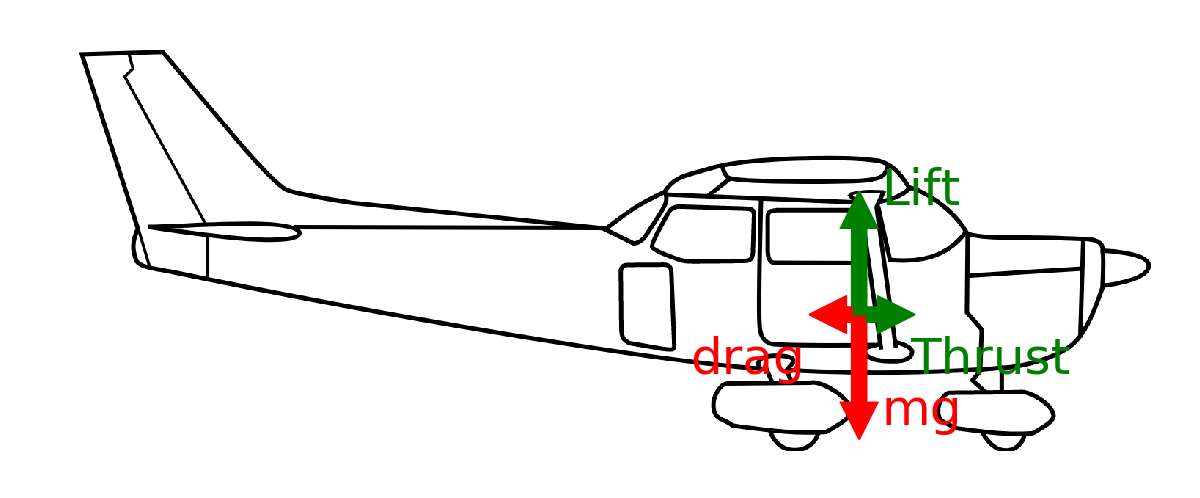

In [11]:
img=mpimg.imread('cessna172.png')

unit_vector=120
unit_value = Trim.mass*Trim.g

plt.imshow(img)
## weight
plt.arrow(1080, 400, 0, unit_vector, width=20, head_width=50, head_length=50,fc='red', ec='red')
plt.text(1110, 550 , 'mg', fontsize =25, color='red')

## Lift 

# This is just a place holder of the plotting later on 
lift_arrow_length = Trim.lift(v_at_trim, alpha_at_trim, delta_e_at_trim) / unit_value * unit_vector
#

plt.arrow(1080, 400, 0, -lift_arrow_length, width=20, head_width=50, head_length=50,fc='Green', ec='Green')
plt.text(1110, 250 , 'Lift', fontsize =25, color='Green')

## Thrust 
thrust_arrow_length = thrust_at_trim / unit_value * unit_vector

plt.arrow(1090, 400, thrust_arrow_length, 0, width=20, head_width=50, head_length=50,fc='Green', ec='Green')
plt.text(1150, 480 , 'Thrust', fontsize =25, color='Green')

## Drag 

drag_arrow_length = Trim.drag(v_at_trim, alpha_at_trim) / unit_value * unit_vector

plt.arrow(1070, 400, -drag_arrow_length, 0, width=20, head_width=50, head_length=50,fc='Red', ec='Red')
plt.text(850, 480 , 'drag', fontsize =25, color='Red')

plt.axis('off')
plt.show()